# RegPlots of Match- Vs. Normal Across Tissues

Show the correlation of pvalues when training the model on normal tissue vs match- dataset

# Inputs

In [25]:
import rnaseq_lib3 as r

import pandas as pd
import numpy as np
import pymc3 as pm
from scipy.stats import pearsonr
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in centered data
df = pd.read_hdf('/mnt/data/expression/tcga_gtex_tpm_norm_filt_centered.hd5')
# Subset
gtex = df[df.label == 'gtex'].sort_values('tissue')
normal = df[df.label == 'tcga-normal'].sort_values('tissue')
tumor = df[df.label == 'tcga-tumor'].sort_values('tissue')
# Read in drug genes
genes = df.columns[5:]
drug_genes = [x.split('\t')[0] for x in open('../data/druggable-genes.tsv', 'r').readlines()]
drug_genes = [x for x in drug_genes if x in df.columns]

# Runs

- Select training genes (100)
- For every disease with a matched normal in TCGA (later try GTEx?)
    - Pick a random tumor of that disease
    - Run model
    - Run model a second time with matched tissue removed
    - Store pvalues and traces
- Make a big scatterplot of match- vs normals and plot weights to check odd examples
    

In [3]:
from collections import defaultdict
pvals, traces = defaultdict(dict), defaultdict(dict)

In [4]:
training_genes = r.outlier.select_k_best_genes(normal, genes, 'tissue', n=100)

In [13]:
for tissue in sorted(tumor.tissue.unique()):
    # Skip if matched normal is missing
    if normal[normal.tissue == tissue].empty:
        continue
    
    # Select random tumor from tissue
    sample = tumor.loc[np.random.choice(tumor[tumor.tissue == tissue].id)]
    n_normals = len(normal[normal.tissue == tissue])
    print(f'Running {n_normals} {tissue} with sample: {sample.id}')
    
    # Remove matched normal
    match_minus = normal[normal.tissue != tissue]
    
    # For normal / match- run model and store traces/pvals
    for name, dataset in zip(['normal', 'match-'], [normal, match_minus]):
    
        # Run model
        _, t = r.outlier.run_model(sample, dataset, 'tissue', 
                                   training_genes=training_genes, 
                                   beta_func=pm.LogitNormal)
    
        # Store traces
        traces[tissue][name] = t

        # Store pvalues
        ppc = r.outlier.ppc_from_coefs(t, drug_genes, dataset, 'tissue')
        ppps = r.outlier.posterior_predictive_pvals(sample, ppc)
        pvals[tissue][name] = ppps

Running 3 Adrenal with sample: TCGA-OR-A5K1-01


INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, b, sigma_b, mu_b, a]
Sampling 4 chains: 100%|██████████| 6000/6000 [22:11<00:00,  2.08draws/s] 
The estimated number of effective samples is smaller than 200 for some parameters.
100%|██████████| 85/85 [02:31<00:00,  1.78s/it]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15

Running 9 Bile with sample: TCGA-3X-AAVB-01


INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, b, sigma_b, mu_b, a]
Sampling 4 chains: 100%|██████████| 6000/6000 [18:32<00:00,  2.21draws/s] 
The acceptance probability does not match the target. It is 0.6974119767342135, but should be close to 0.8. Try to increase the number of tuning steps.
100%|██████████| 85/85 [02:31<00:00,  1.85s/it]
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--gener

Running 19 Bladder with sample: TCGA-FD-A62P-01


INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, b, sigma_b, mu_b, a]
Sampling 4 chains:  74%|███████▍  | 4448/6000 [15:37<02:13, 11.60draws/s]  IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.r

Running 5 Brain with sample: TCGA-P5-A737-01


INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, b, sigma_b, mu_b, a]
Sampling 4 chains: 100%|██████████| 6000/6000 [21:10<00:00,  2.39draws/s] 
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `targe

Running 112 Breast with sample: TCGA-EW-A6SB-01


INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, b, sigma_b, mu_b, a]
Sampling 4 chains: 100%|██████████| 6000/6000 [19:23<00:00,  4.27draws/s] 
The number of effective samples is smaller than 25% for some parameters.
100%|██████████| 85/85 [02:34<00:00,  1.81s/it]
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning N

Running 3 Cervix with sample: TCGA-VS-AA62-01


INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, b, sigma_b, mu_b, a]
Sampling 4 chains: 100%|██████████| 6000/6000 [22:34<00:00,  2.18draws/s] 
The acceptance probability does not match the target. It is 0.9012253014332625, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
100%|██████████| 85/85 [02:31<00:00,  1.77s/it]
INFO (theano.gof.compil

Running 51 Colon with sample: TCGA-CK-4950-01


INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, b, sigma_b, mu_b, a]
Sampling 4 chains: 100%|██████████| 6000/6000 [21:36<00:00,  2.59draws/s] 
The number of effective samples is smaller than 25% for some parameters.
 14%|█▎        | 68/500 [00:05<00:32, 13.34it/s]IOPub message ra

Running 13 Esophagus with sample: TCGA-RE-A7BO-01


INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, b, sigma_b, mu_b, a]
Sampling 4 chains:  12%|█▏        | 744/6000 [06:59<1:22:18,  1.06draws/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.ra

Running 44 Head with sample: TCGA-CR-6472-01


INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, b, sigma_b, mu_b, a]
Sampling 4 chains:  89%|████████▉ | 5340/6000 [21:16<04:32,  2.43draws/s] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.ra

Running 50 Liver with sample: TCGA-UB-A7MB-01


INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-

INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, b, sigma_b, mu_b, a]
Sampling 4 chains:  10%|█         | 620/6000 [05:33<1:28:57,  1.01draws/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Sampling 4 chains: 100%|██████████| 6000/6000 [17:27<00:00,  3.04draws/s]
The number of effective samples is smaller than 25% for some parameters.
100%|██████████| 85/85 [02:25<00:00,  1.76s/it]


Running 1 Skin with sample: TCGA-EB-A551-01


INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, b, sigma_b, mu_b, a]
Sampling 4 chains:  42%|████▏     | 2534/6000 [14:29<

Running 36 Stomach with sample: TCGA-BR-A4J9-01


INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-

Running 2 Thymus with sample: TCGA-ZB-A96H-01


INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-

## Serialize Traces and Pvalues

In [39]:
import pickle
import os

path = '/mnt/research_serializations/RegPlots-of-MatchMinus-Vs-Normal-Across-Tissues'
with open(os.path.join(path, 'pvals.pkl'), 'wb') as f:
    pickle.dump(pvals, f)
    
with open(os.path.join(path, 'traces.pkl'), 'wb') as f:
    pickle.dump(traces, f)

## RegPlots

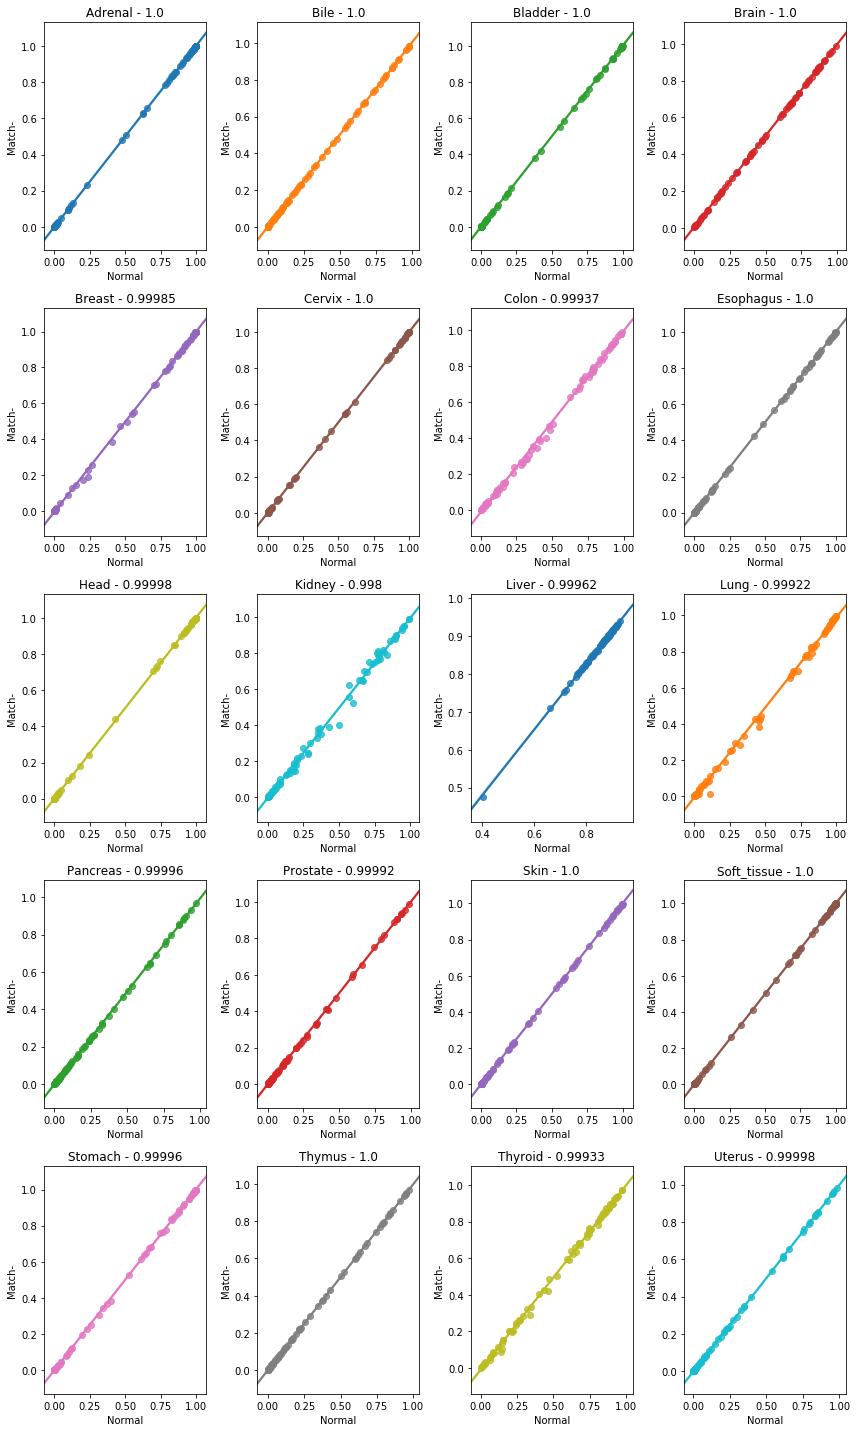

In [32]:
f, ax = plt.subplots(5, 4, figsize=(12, 20))
ax = ax.flatten()
for i, tissue in enumerate(sorted(pvals.keys())):
    # Make DF from pvals
    norm = pvals[tissue]['normal']
    match = pvals[tissue]['match-']
    pv = pd.DataFrame([norm, match], index=['Normal', 'Match-']).T
    
    # Calculate pearsonR
    pr = round(pearsonr(pv.Normal, pv['Match-'])[0], 5)
    
    # Plot RegPlot
    sns.regplot(data=pv, x='Normal', y='Match-', ax=ax[i])
    ax[i].set_title(f'{tissue} - {pr}')
    
plt.tight_layout()

## Traces / Weights

### Kidney

#### Normal

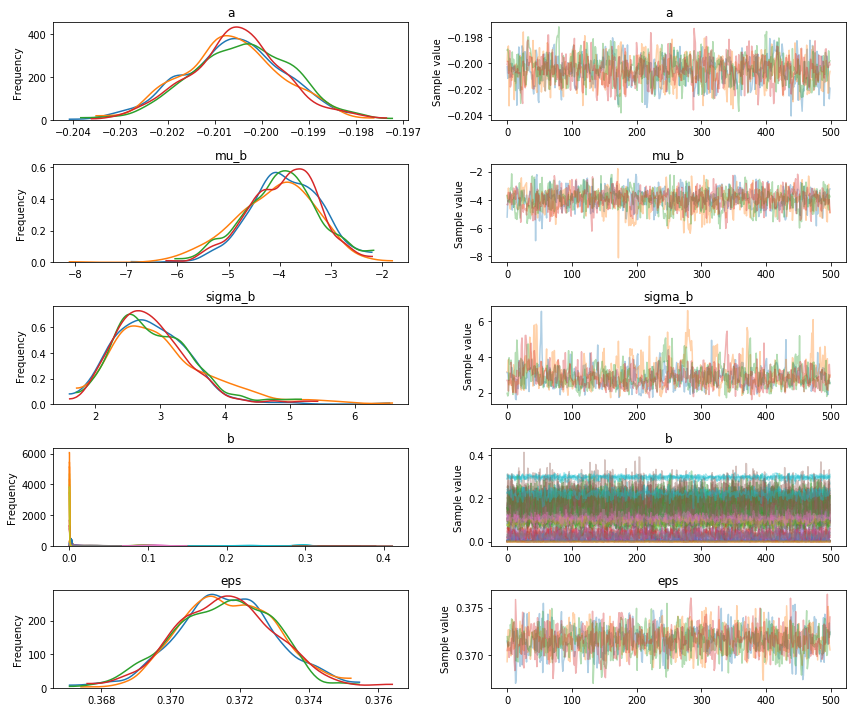

In [57]:
pm.traceplot(traces['Kidney']['normal']);

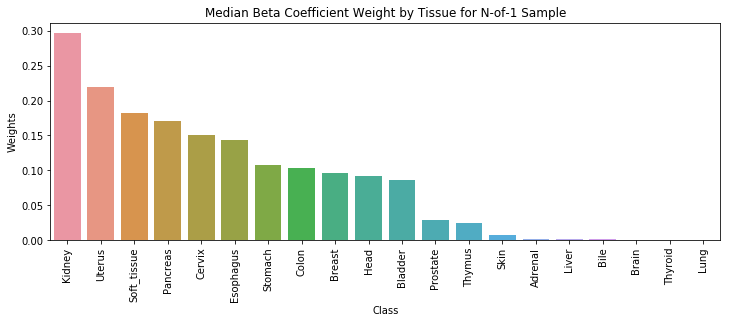

In [60]:
r.outlier.plot_weights(sorted(normal.tissue.unique()), traces['Kidney']['normal'])

#### Match-

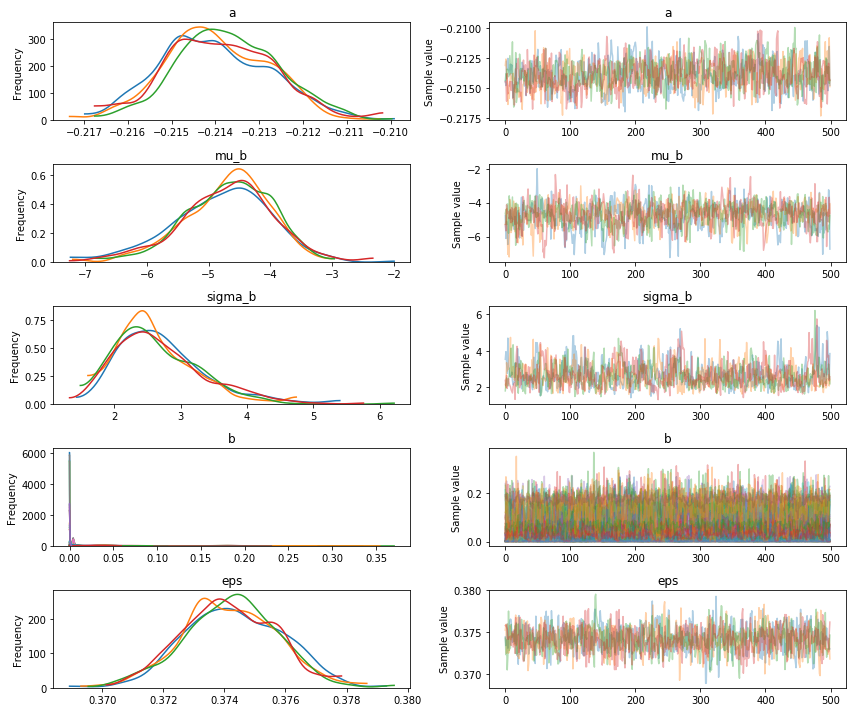

In [58]:
pm.traceplot(traces['Kidney']['match-']);

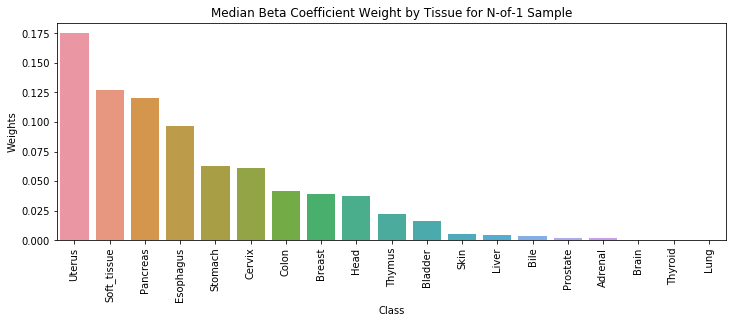

In [63]:
r.outlier.plot_weights(sorted(normal[normal.tissue != 'Kidney'].tissue.unique()), 
                       traces['Kidney']['match-'])

# GTEx

## Thyroid

In [43]:
sample = tumor.loc[np.random.choice(tumor[tumor.tissue == 'Thyroid'].id)]
sample.id

'TCGA-EL-A3CO-01'

In [ ]:
training_genes = r.outlier.select_k_best_genes(gtex, genes, 'tissue', n=100)

Run normal model

In [44]:
_, t_normal = r.outlier.run_model(sample, gtex, 'tissue', 
                                  training_genes=training_genes, 
                                  beta_func=pm.LogitNormal)

INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-

In [45]:
thyroid_minus = gtex[gtex.tissue != 'Thyroid']

In [46]:
_, t_minus = r.outlier.run_model(sample, thyroid_minus, 'tissue', 
                                 training_genes=training_genes, 
                                 beta_func=pm.LogitNormal)

INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.6.5-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /home/ubuntu/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-

In [ ]:
ppc_t = r.outlier.ppc_from_coefs(t_normal, drug_genes, gtex, 'tissue')
ppps_t = r.outlier.posterior_predictive_pvals(sample, ppc_t)

In [48]:
ppc_m = r.outlier.ppc_from_coefs(t_minus, drug_genes, thyroid_minus, 'tissue')
ppps_m = r.outlier.posterior_predictive_pvals(sample, ppc_m)

100%|██████████| 85/85 [25:26<00:00, 18.08s/it]


In [49]:
pv = pd.DataFrame([ppps_t, ppps_m], index=['Normal', 'Match-']).T

In [50]:
pr = round(pearsonr(pv.Normal, pv['Match-'])[0], 5)

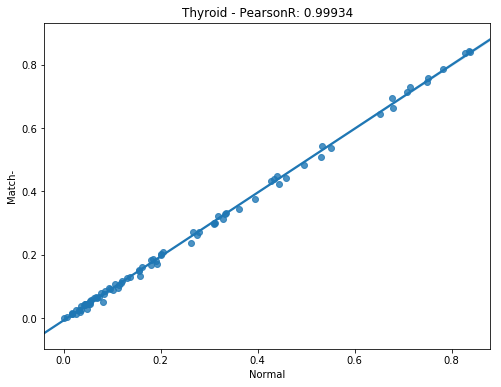

In [70]:
plt.figure(figsize=(8, 6))
sns.regplot(data=pv, x='Normal', y='Match-')
plt.title(f'Thyroid - PearsonR: {pr}');

### Weights

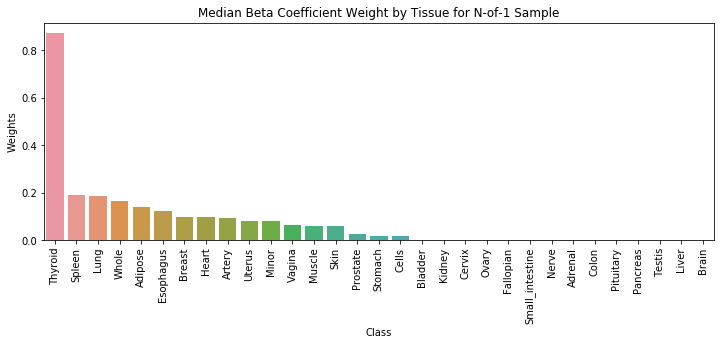

In [67]:
r.outlier.plot_weights(gtex.tissue.unique(), t_normal)

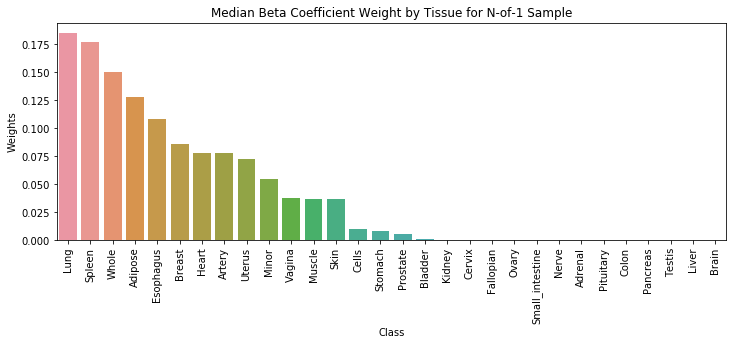

In [68]:
r.outlier.plot_weights(thyroid_minus.tissue.unique(), t_minus)